In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F

**Create a Model Class that Inherits nn.Module**

In [16]:
class Model(nn.Module):
  def __init__(self, input_features=4, hidden1 = 8, hidden2 = 8, out_features = 3):
    super().__init__()
    self.fully_connected1 = nn.Linear(input_features, hidden1)
    self.fully_connected2 = nn.Linear(hidden1, hidden2)
    self.out = nn.Linear(hidden2, out_features)

  def forward(self, x):
    x = F.relu(self.fully_connected1(x))
    x = F.relu(self.fully_connected2(x))
    x = self.out(x)

    return x

**Pick a manual seed for randomization**

In [17]:
torch.manual_seed(41)
model = Model()

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df = pd.read_csv(url)
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


Change Last Column from strings to integer

In [20]:
df['variety'] = df['variety'].replace('Setosa', 0)
df['variety'] = df['variety'].replace('Versicolor', 1)
df['variety'] = df['variety'].replace('Virginica', 2)
df.head()
df.tail()

/tmp/ipython-input-20-511731722.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['variety'] = df['variety'].replace('Virginica', 2)


,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


**Train Test Split**

In [21]:
X = df.drop('variety', axis=1)
X.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
y = df['variety']
y.head()

,variety
0,0
1,0
2,0
3,0
4,0


Convert X and y into a numpy array

In [23]:
X = X.values
y = y.values

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

Convert X & y labels to tensors

In [26]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [27]:
# Set the criterion of model to measure the error
criterion = nn.CrossEntropyLoss()
# Choose Adam optimizer, lr = learning_rate
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

**Train Our Model**

In [29]:
# Epochs? (One run through all the training dat in our network)
epochs = 100
losses = []
for i in range (epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted result

  # Measure the loss or error
  loss = criterion(y_pred, y_train)

  # Keep track of our losses
  losses.append(loss.detach().numpy())

  # Print evry 10 epochs
  if i%10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.1318365335464478
Epoch: 10 and loss: 0.9658561944961548
Epoch: 20 and loss: 0.678993821144104
Epoch: 30 and loss: 0.4004894196987152
Epoch: 40 and loss: 0.2250950187444687
Epoch: 50 and loss: 0.12207333743572235
Epoch: 60 and loss: 0.07481686770915985
Epoch: 70 and loss: 0.05451279506087303
Epoch: 80 and loss: 0.044374920427799225
Epoch: 90 and loss: 0.03837944194674492


**Graph it out**

Text(0.5, 0, 'Epoch')

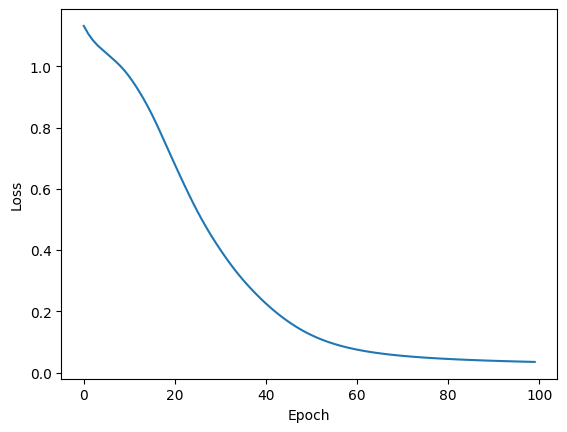

In [30]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')